In [1]:
#csv파일을 numpy배열로 읽기
import numpy as np
import pandas as pd
import sys
import tensorflow.keras.utils as utils #원핫 인코딩
from tensorflow.keras.models import Sequential #모델 생성
from tensorflow.keras.layers import Dense,Activation
import matplotlib.pyplot as plt

# 1.데이터 셋 생성vs전처리

In [2]:
#csv 파일을 dataframe으로 읽어와서 numpy배열로 변환 
df=pd.read_csv("data/pima-indians-diabetes.csv",comment="#",header=None)
                                                #>>위에 설명 제거,1번줄이 헤더로x
df.head(3)

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [3]:
dataset=np.array(df)
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [4]:
#csv파일을 numpy 배열로 읽어오기
dataset = np.loadtxt('data/pima-indians-diabetes.csv', delimiter=',')
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [5]:
dataset.shape

(768, 9)

In [6]:
#학습용 데이터(훈련데이터=훈련셋) 700개
X_train=dataset[:700,:-1]
Y_train=dataset[:700,-1]
#테스트 데이터(시험데이터=시험셋)
X_test=dataset[700:,:-1]
Y_test=dataset[700:,-1]

In [7]:
#독립변수 8,타겟변수 1(원핫인코딩 x)
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((700, 8), (700,), (68, 8), (68,))

# 2.모델 구성

In [8]:
model=Sequential() #activation>>sigmoid
model.add(Dense(12,input_dim=8,activation="relu"))
model.add(Dense(30,activation="relu"))
model.add(Dense(40,activation="relu"))
model.add(Dense(25,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
# input_dim은 8, 최종 출력 1
#model.add(Dense(12, input_dim=8, activation='relu'))
#model.add(Dense(8, activation='relu'))
#model.add(Dense(1, activation="sigmoid"))

In [9]:
model.summary() #108=12*8+12,#390=30*12+30 #31=30*1+1

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                390       
_________________________________________________________________
dense_2 (Dense)              (None, 40)                1240      
_________________________________________________________________
dense_3 (Dense)              (None, 25)                1025      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 26        
Total params: 2,789
Trainable params: 2,789
Non-trainable params: 0
_________________________________________________________________


# 3.학습과정 설정(loss,optimizer,metrics)

In [10]:
model.compile(loss='binary_crossentropy', optimizer="adam",
             metrics=['accuracy'])

# 4.학습시키기

In [11]:
hist = model.fit(X_train, Y_train, epochs=3000, batch_size=64)

Epoch 1/3000
11/11 [==============================] - 0s 701us/step - loss: 1.8671 - accuracy: 0.5314
Epoch 2/3000
11/11 [==============================] - 0s 601us/step - loss: 0.8902 - accuracy: 0.6514
Epoch 3/3000
11/11 [==============================] - 0s 701us/step - loss: 0.7211 - accuracy: 0.6443
Epoch 4/3000
11/11 [==============================] - 0s 701us/step - loss: 0.6738 - accuracy: 0.6629
Epoch 5/3000
11/11 [==============================] - 0s 601us/step - loss: 0.6508 - accuracy: 0.6729
Epoch 6/3000
11/11 [==============================] - 0s 601us/step - loss: 0.6315 - accuracy: 0.6643
Epoch 7/3000
11/11 [==============================] - 0s 600us/step - loss: 0.6488 - accuracy: 0.6700
Epoch 8/3000
11/11 [==============================] - 0s 601us/step - loss: 0.6158 - accuracy: 0.6871
Epoch 9/3000
11/11 [==============================] - 0s 600us/step - loss: 0.5933 - accuracy: 0.6986
Epoch 10/3000
11/11 [==============================] - 0s 601us/step - loss: 0.591

11/11 [==============================] - 0s 601us/step - loss: 0.4633 - accuracy: 0.7586
Epoch 81/3000
11/11 [==============================] - 0s 601us/step - loss: 0.4596 - accuracy: 0.7771
Epoch 82/3000
11/11 [==============================] - 0s 501us/step - loss: 0.4716 - accuracy: 0.7700
Epoch 83/3000
11/11 [==============================] - 0s 678us/step - loss: 0.4620 - accuracy: 0.7600
Epoch 84/3000
11/11 [==============================] - 0s 601us/step - loss: 0.4583 - accuracy: 0.7757
Epoch 85/3000
11/11 [==============================] - 0s 601us/step - loss: 0.4510 - accuracy: 0.7714
Epoch 86/3000
11/11 [==============================] - 0s 623us/step - loss: 0.4697 - accuracy: 0.7671
Epoch 87/3000
11/11 [==============================] - 0s 701us/step - loss: 0.4700 - accuracy: 0.7500
Epoch 88/3000
11/11 [==============================] - 0s 701us/step - loss: 0.4542 - accuracy: 0.7714
Epoch 89/3000
11/11 [==============================] - 0s 601us/step - loss: 0.4492 - a

11/11 [==============================] - 0s 601us/step - loss: 0.4125 - accuracy: 0.7929
Epoch 160/3000
11/11 [==============================] - 0s 600us/step - loss: 0.4102 - accuracy: 0.8000
Epoch 161/3000
11/11 [==============================] - 0s 601us/step - loss: 0.4117 - accuracy: 0.8000
Epoch 162/3000
11/11 [==============================] - 0s 701us/step - loss: 0.4044 - accuracy: 0.7900
Epoch 163/3000
11/11 [==============================] - 0s 601us/step - loss: 0.4119 - accuracy: 0.7929
Epoch 164/3000
11/11 [==============================] - 0s 601us/step - loss: 0.4372 - accuracy: 0.7843
Epoch 165/3000
11/11 [==============================] - 0s 700us/step - loss: 0.4141 - accuracy: 0.8029
Epoch 166/3000
11/11 [==============================] - 0s 656us/step - loss: 0.4189 - accuracy: 0.7814
Epoch 167/3000
11/11 [==============================] - 0s 701us/step - loss: 0.4085 - accuracy: 0.7986
Epoch 168/3000
11/11 [==============================] - 0s 600us/step - loss: 0

11/11 [==============================] - 0s 601us/step - loss: 0.3709 - accuracy: 0.8129
Epoch 238/3000
11/11 [==============================] - 0s 601us/step - loss: 0.3940 - accuracy: 0.8114
Epoch 239/3000
11/11 [==============================] - 0s 601us/step - loss: 0.3938 - accuracy: 0.8129
Epoch 240/3000
11/11 [==============================] - 0s 601us/step - loss: 0.3527 - accuracy: 0.8243
Epoch 241/3000
11/11 [==============================] - 0s 601us/step - loss: 0.3645 - accuracy: 0.8114
Epoch 242/3000
11/11 [==============================] - 0s 601us/step - loss: 0.3617 - accuracy: 0.8200
Epoch 243/3000
11/11 [==============================] - 0s 601us/step - loss: 0.3572 - accuracy: 0.8257
Epoch 244/3000
11/11 [==============================] - 0s 600us/step - loss: 0.3602 - accuracy: 0.8286
Epoch 245/3000
11/11 [==============================] - 0s 500us/step - loss: 0.3752 - accuracy: 0.8157
Epoch 246/3000
11/11 [==============================] - 0s 601us/step - loss: 0

11/11 [==============================] - 0s 600us/step - loss: 0.3314 - accuracy: 0.8386
Epoch 316/3000
11/11 [==============================] - 0s 701us/step - loss: 0.3388 - accuracy: 0.8357
Epoch 317/3000
11/11 [==============================] - 0s 601us/step - loss: 0.3226 - accuracy: 0.8471
Epoch 318/3000
11/11 [==============================] - 0s 601us/step - loss: 0.3334 - accuracy: 0.8471
Epoch 319/3000
11/11 [==============================] - 0s 600us/step - loss: 0.3315 - accuracy: 0.8486
Epoch 320/3000
11/11 [==============================] - 0s 701us/step - loss: 0.3297 - accuracy: 0.8414
Epoch 321/3000
11/11 [==============================] - 0s 601us/step - loss: 0.3223 - accuracy: 0.8414
Epoch 322/3000
11/11 [==============================] - 0s 561us/step - loss: 0.3321 - accuracy: 0.8414
Epoch 323/3000
11/11 [==============================] - 0s 687us/step - loss: 0.3474 - accuracy: 0.8271
Epoch 324/3000
11/11 [==============================] - 0s 601us/step - loss: 0

11/11 [==============================] - 0s 601us/step - loss: 0.3221 - accuracy: 0.8371
Epoch 394/3000
11/11 [==============================] - 0s 600us/step - loss: 0.3205 - accuracy: 0.8571
Epoch 395/3000
11/11 [==============================] - 0s 607us/step - loss: 0.3060 - accuracy: 0.8729
Epoch 396/3000
11/11 [==============================] - 0s 701us/step - loss: 0.3034 - accuracy: 0.8600
Epoch 397/3000
11/11 [==============================] - 0s 701us/step - loss: 0.3213 - accuracy: 0.8443
Epoch 398/3000
11/11 [==============================] - 0s 701us/step - loss: 0.3105 - accuracy: 0.8457
Epoch 399/3000
11/11 [==============================] - 0s 600us/step - loss: 0.3086 - accuracy: 0.8529
Epoch 400/3000
11/11 [==============================] - 0s 701us/step - loss: 0.3172 - accuracy: 0.8586
Epoch 401/3000
11/11 [==============================] - 0s 601us/step - loss: 0.3195 - accuracy: 0.8429
Epoch 402/3000
11/11 [==============================] - 0s 664us/step - loss: 0

11/11 [==============================] - 0s 601us/step - loss: 0.3196 - accuracy: 0.8600
Epoch 472/3000
11/11 [==============================] - 0s 601us/step - loss: 0.3028 - accuracy: 0.8557
Epoch 473/3000
11/11 [==============================] - 0s 701us/step - loss: 0.3140 - accuracy: 0.8471
Epoch 474/3000
11/11 [==============================] - 0s 601us/step - loss: 0.3261 - accuracy: 0.8371
Epoch 475/3000
11/11 [==============================] - 0s 600us/step - loss: 0.2942 - accuracy: 0.8643
Epoch 476/3000
11/11 [==============================] - 0s 600us/step - loss: 0.3218 - accuracy: 0.8500
Epoch 477/3000
11/11 [==============================] - 0s 701us/step - loss: 0.2958 - accuracy: 0.8557
Epoch 478/3000
11/11 [==============================] - 0s 601us/step - loss: 0.2810 - accuracy: 0.8686
Epoch 479/3000
11/11 [==============================] - 0s 701us/step - loss: 0.2860 - accuracy: 0.8714
Epoch 480/3000
11/11 [==============================] - 0s 500us/step - loss: 0

11/11 [==============================] - 0s 601us/step - loss: 0.3205 - accuracy: 0.8486
Epoch 550/3000
11/11 [==============================] - 0s 601us/step - loss: 0.2690 - accuracy: 0.8729
Epoch 551/3000
11/11 [==============================] - 0s 600us/step - loss: 0.2662 - accuracy: 0.8857
Epoch 552/3000
11/11 [==============================] - 0s 600us/step - loss: 0.2692 - accuracy: 0.8757
Epoch 553/3000
11/11 [==============================] - 0s 701us/step - loss: 0.2777 - accuracy: 0.8757
Epoch 554/3000
11/11 [==============================] - 0s 601us/step - loss: 0.3049 - accuracy: 0.8614
Epoch 555/3000
11/11 [==============================] - 0s 601us/step - loss: 0.2761 - accuracy: 0.8900
Epoch 556/3000
11/11 [==============================] - 0s 601us/step - loss: 0.3050 - accuracy: 0.8586
Epoch 557/3000
11/11 [==============================] - 0s 600us/step - loss: 0.3635 - accuracy: 0.8271
Epoch 558/3000
11/11 [==============================] - 0s 601us/step - loss: 0

11/11 [==============================] - 0s 601us/step - loss: 0.3233 - accuracy: 0.8529
Epoch 628/3000
11/11 [==============================] - 0s 601us/step - loss: 0.3428 - accuracy: 0.8529
Epoch 629/3000
11/11 [==============================] - 0s 601us/step - loss: 0.3649 - accuracy: 0.8186
Epoch 630/3000
11/11 [==============================] - 0s 601us/step - loss: 0.2879 - accuracy: 0.8714
Epoch 631/3000
11/11 [==============================] - 0s 500us/step - loss: 0.2874 - accuracy: 0.8729
Epoch 632/3000
11/11 [==============================] - 0s 701us/step - loss: 0.2566 - accuracy: 0.8886
Epoch 633/3000
11/11 [==============================] - 0s 601us/step - loss: 0.2475 - accuracy: 0.8886
Epoch 634/3000
11/11 [==============================] - 0s 601us/step - loss: 0.2437 - accuracy: 0.8957
Epoch 635/3000
11/11 [==============================] - 0s 701us/step - loss: 0.2354 - accuracy: 0.8986
Epoch 636/3000
11/11 [==============================] - 0s 601us/step - loss: 0

11/11 [==============================] - 0s 601us/step - loss: 0.2421 - accuracy: 0.8814
Epoch 706/3000
11/11 [==============================] - 0s 600us/step - loss: 0.2297 - accuracy: 0.8929
Epoch 707/3000
11/11 [==============================] - 0s 600us/step - loss: 0.2328 - accuracy: 0.9000
Epoch 708/3000
11/11 [==============================] - 0s 601us/step - loss: 0.2372 - accuracy: 0.8957
Epoch 709/3000
11/11 [==============================] - 0s 601us/step - loss: 0.2289 - accuracy: 0.8986
Epoch 710/3000
11/11 [==============================] - 0s 600us/step - loss: 0.2547 - accuracy: 0.8800
Epoch 711/3000
11/11 [==============================] - 0s 600us/step - loss: 0.2442 - accuracy: 0.8900
Epoch 712/3000
11/11 [==============================] - 0s 601us/step - loss: 0.2340 - accuracy: 0.8900
Epoch 713/3000
11/11 [==============================] - 0s 601us/step - loss: 0.2428 - accuracy: 0.9000
Epoch 714/3000
11/11 [==============================] - 0s 600us/step - loss: 0

11/11 [==============================] - 0s 600us/step - loss: 0.2385 - accuracy: 0.8957
Epoch 784/3000
11/11 [==============================] - 0s 701us/step - loss: 0.2192 - accuracy: 0.9071
Epoch 785/3000
11/11 [==============================] - 0s 501us/step - loss: 0.2188 - accuracy: 0.9000
Epoch 786/3000
11/11 [==============================] - 0s 701us/step - loss: 0.2373 - accuracy: 0.9000
Epoch 787/3000
11/11 [==============================] - 0s 501us/step - loss: 0.2632 - accuracy: 0.8757
Epoch 788/3000
11/11 [==============================] - 0s 701us/step - loss: 0.2837 - accuracy: 0.8857
Epoch 789/3000
11/11 [==============================] - 0s 601us/step - loss: 0.2437 - accuracy: 0.9071
Epoch 790/3000
11/11 [==============================] - 0s 601us/step - loss: 0.2205 - accuracy: 0.8957
Epoch 791/3000
11/11 [==============================] - 0s 601us/step - loss: 0.2317 - accuracy: 0.9000
Epoch 792/3000
11/11 [==============================] - 0s 600us/step - loss: 0

11/11 [==============================] - 0s 601us/step - loss: 0.2127 - accuracy: 0.9029
Epoch 862/3000
11/11 [==============================] - 0s 601us/step - loss: 0.2041 - accuracy: 0.9043
Epoch 863/3000
11/11 [==============================] - 0s 600us/step - loss: 0.1960 - accuracy: 0.9271
Epoch 864/3000
11/11 [==============================] - 0s 701us/step - loss: 0.2100 - accuracy: 0.9157
Epoch 865/3000
11/11 [==============================] - 0s 601us/step - loss: 0.2143 - accuracy: 0.8971
Epoch 866/3000
11/11 [==============================] - 0s 601us/step - loss: 0.2110 - accuracy: 0.9114
Epoch 867/3000
11/11 [==============================] - 0s 601us/step - loss: 0.2339 - accuracy: 0.8886
Epoch 868/3000
11/11 [==============================] - 0s 701us/step - loss: 0.2287 - accuracy: 0.8986
Epoch 869/3000
11/11 [==============================] - 0s 701us/step - loss: 0.2079 - accuracy: 0.9086
Epoch 870/3000
11/11 [==============================] - 0s 600us/step - loss: 0

11/11 [==============================] - 0s 701us/step - loss: 0.2210 - accuracy: 0.9086
Epoch 940/3000
11/11 [==============================] - 0s 701us/step - loss: 0.2239 - accuracy: 0.9029
Epoch 941/3000
11/11 [==============================] - 0s 701us/step - loss: 0.2700 - accuracy: 0.8800
Epoch 942/3000
11/11 [==============================] - 0s 600us/step - loss: 0.2419 - accuracy: 0.8986
Epoch 943/3000
11/11 [==============================] - 0s 601us/step - loss: 0.2320 - accuracy: 0.8843
Epoch 944/3000
11/11 [==============================] - 0s 601us/step - loss: 0.2257 - accuracy: 0.9029
Epoch 945/3000
11/11 [==============================] - 0s 600us/step - loss: 0.2944 - accuracy: 0.8714
Epoch 946/3000
11/11 [==============================] - 0s 601us/step - loss: 0.2667 - accuracy: 0.8814
Epoch 947/3000
11/11 [==============================] - 0s 600us/step - loss: 0.2300 - accuracy: 0.9057
Epoch 948/3000
11/11 [==============================] - 0s 601us/step - loss: 0

11/11 [==============================] - 0s 601us/step - loss: 0.1924 - accuracy: 0.9200
Epoch 1018/3000
11/11 [==============================] - 0s 601us/step - loss: 0.2144 - accuracy: 0.9114
Epoch 1019/3000
11/11 [==============================] - 0s 600us/step - loss: 0.1973 - accuracy: 0.9114
Epoch 1020/3000
11/11 [==============================] - 0s 601us/step - loss: 0.1872 - accuracy: 0.9271
Epoch 1021/3000
11/11 [==============================] - 0s 601us/step - loss: 0.2065 - accuracy: 0.9129
Epoch 1022/3000
11/11 [==============================] - 0s 601us/step - loss: 0.2046 - accuracy: 0.9171
Epoch 1023/3000
11/11 [==============================] - 0s 701us/step - loss: 0.1893 - accuracy: 0.9057
Epoch 1024/3000
11/11 [==============================] - 0s 601us/step - loss: 0.1918 - accuracy: 0.9186
Epoch 1025/3000
11/11 [==============================] - 0s 600us/step - loss: 0.1902 - accuracy: 0.9200
Epoch 1026/3000
11/11 [==============================] - 0s 590us/step 

11/11 [==============================] - 0s 601us/step - loss: 0.1741 - accuracy: 0.9314
Epoch 1096/3000
11/11 [==============================] - 0s 600us/step - loss: 0.1654 - accuracy: 0.9386
Epoch 1097/3000
11/11 [==============================] - 0s 601us/step - loss: 0.1807 - accuracy: 0.9243
Epoch 1098/3000
11/11 [==============================] - 0s 601us/step - loss: 0.1835 - accuracy: 0.9229
Epoch 1099/3000
11/11 [==============================] - 0s 601us/step - loss: 0.1899 - accuracy: 0.9229
Epoch 1100/3000
11/11 [==============================] - 0s 600us/step - loss: 0.1818 - accuracy: 0.9186
Epoch 1101/3000
11/11 [==============================] - 0s 701us/step - loss: 0.1907 - accuracy: 0.9214
Epoch 1102/3000
11/11 [==============================] - 0s 701us/step - loss: 0.1853 - accuracy: 0.9229
Epoch 1103/3000
11/11 [==============================] - 0s 590us/step - loss: 0.1672 - accuracy: 0.9357
Epoch 1104/3000
11/11 [==============================] - 0s 600us/step 

11/11 [==============================] - 0s 701us/step - loss: 0.1810 - accuracy: 0.9200
Epoch 1174/3000
11/11 [==============================] - 0s 601us/step - loss: 0.2102 - accuracy: 0.9100
Epoch 1175/3000
11/11 [==============================] - 0s 601us/step - loss: 0.2116 - accuracy: 0.9029
Epoch 1176/3000
11/11 [==============================] - 0s 600us/step - loss: 0.2377 - accuracy: 0.8929
Epoch 1177/3000
11/11 [==============================] - 0s 601us/step - loss: 0.2136 - accuracy: 0.9071
Epoch 1178/3000
11/11 [==============================] - 0s 601us/step - loss: 0.2089 - accuracy: 0.9086
Epoch 1179/3000
11/11 [==============================] - 0s 601us/step - loss: 0.1984 - accuracy: 0.9157
Epoch 1180/3000
11/11 [==============================] - 0s 601us/step - loss: 0.2299 - accuracy: 0.9100
Epoch 1181/3000
11/11 [==============================] - 0s 600us/step - loss: 0.2345 - accuracy: 0.8986
Epoch 1182/3000
11/11 [==============================] - 0s 601us/step 

11/11 [==============================] - 0s 701us/step - loss: 0.1725 - accuracy: 0.9271
Epoch 1252/3000
11/11 [==============================] - 0s 601us/step - loss: 0.1708 - accuracy: 0.9257
Epoch 1253/3000
11/11 [==============================] - 0s 601us/step - loss: 0.1633 - accuracy: 0.9357
Epoch 1254/3000
11/11 [==============================] - 0s 601us/step - loss: 0.1593 - accuracy: 0.9314
Epoch 1255/3000
11/11 [==============================] - 0s 601us/step - loss: 0.1605 - accuracy: 0.9286
Epoch 1256/3000
11/11 [==============================] - 0s 601us/step - loss: 0.1490 - accuracy: 0.9500
Epoch 1257/3000
11/11 [==============================] - 0s 701us/step - loss: 0.1614 - accuracy: 0.9386
Epoch 1258/3000
11/11 [==============================] - 0s 601us/step - loss: 0.1537 - accuracy: 0.9400
Epoch 1259/3000
11/11 [==============================] - 0s 601us/step - loss: 0.1782 - accuracy: 0.9200
Epoch 1260/3000
11/11 [==============================] - 0s 601us/step 

11/11 [==============================] - 0s 601us/step - loss: 0.1927 - accuracy: 0.9129
Epoch 1330/3000
11/11 [==============================] - 0s 685us/step - loss: 0.1825 - accuracy: 0.9257
Epoch 1331/3000
11/11 [==============================] - 0s 601us/step - loss: 0.1677 - accuracy: 0.9286
Epoch 1332/3000
11/11 [==============================] - 0s 701us/step - loss: 0.1666 - accuracy: 0.9229
Epoch 1333/3000
11/11 [==============================] - 0s 500us/step - loss: 0.1504 - accuracy: 0.9386
Epoch 1334/3000
11/11 [==============================] - 0s 601us/step - loss: 0.1533 - accuracy: 0.9386
Epoch 1335/3000
11/11 [==============================] - 0s 601us/step - loss: 0.1630 - accuracy: 0.9357
Epoch 1336/3000
11/11 [==============================] - 0s 701us/step - loss: 0.1560 - accuracy: 0.9443
Epoch 1337/3000
11/11 [==============================] - 0s 601us/step - loss: 0.1731 - accuracy: 0.9243
Epoch 1338/3000
11/11 [==============================] - 0s 601us/step 

11/11 [==============================] - 0s 601us/step - loss: 0.1433 - accuracy: 0.9414
Epoch 1408/3000
11/11 [==============================] - 0s 601us/step - loss: 0.1523 - accuracy: 0.9329
Epoch 1409/3000
11/11 [==============================] - 0s 601us/step - loss: 0.1622 - accuracy: 0.9214
Epoch 1410/3000
11/11 [==============================] - 0s 701us/step - loss: 0.1417 - accuracy: 0.9486
Epoch 1411/3000
11/11 [==============================] - 0s 601us/step - loss: 0.1445 - accuracy: 0.9443
Epoch 1412/3000
11/11 [==============================] - 0s 601us/step - loss: 0.1582 - accuracy: 0.9286
Epoch 1413/3000
11/11 [==============================] - 0s 557us/step - loss: 0.1506 - accuracy: 0.9343
Epoch 1414/3000
11/11 [==============================] - 0s 601us/step - loss: 0.1493 - accuracy: 0.9314
Epoch 1415/3000
11/11 [==============================] - 0s 601us/step - loss: 0.1624 - accuracy: 0.9386
Epoch 1416/3000
11/11 [==============================] - 0s 601us/step 

11/11 [==============================] - 0s 601us/step - loss: 0.1427 - accuracy: 0.9429
Epoch 1486/3000
11/11 [==============================] - 0s 601us/step - loss: 0.1613 - accuracy: 0.9429
Epoch 1487/3000
11/11 [==============================] - 0s 701us/step - loss: 0.1353 - accuracy: 0.9500
Epoch 1488/3000
11/11 [==============================] - 0s 601us/step - loss: 0.1361 - accuracy: 0.9471
Epoch 1489/3000
11/11 [==============================] - 0s 601us/step - loss: 0.1479 - accuracy: 0.9457
Epoch 1490/3000
11/11 [==============================] - 0s 601us/step - loss: 0.1810 - accuracy: 0.9343
Epoch 1491/3000
11/11 [==============================] - 0s 600us/step - loss: 0.1568 - accuracy: 0.9471
Epoch 1492/3000
11/11 [==============================] - 0s 601us/step - loss: 0.1888 - accuracy: 0.9229
Epoch 1493/3000
11/11 [==============================] - 0s 601us/step - loss: 0.1710 - accuracy: 0.9329
Epoch 1494/3000
11/11 [==============================] - 0s 601us/step 

11/11 [==============================] - 0s 600us/step - loss: 0.1449 - accuracy: 0.9429
Epoch 1564/3000
11/11 [==============================] - 0s 601us/step - loss: 0.1269 - accuracy: 0.9457
Epoch 1565/3000
11/11 [==============================] - 0s 600us/step - loss: 0.1246 - accuracy: 0.9429
Epoch 1566/3000
11/11 [==============================] - 0s 601us/step - loss: 0.1575 - accuracy: 0.9357
Epoch 1567/3000
11/11 [==============================] - 0s 601us/step - loss: 0.1252 - accuracy: 0.9500
Epoch 1568/3000
11/11 [==============================] - 0s 701us/step - loss: 0.1271 - accuracy: 0.9500
Epoch 1569/3000
11/11 [==============================] - 0s 701us/step - loss: 0.1486 - accuracy: 0.9443
Epoch 1570/3000
11/11 [==============================] - 0s 601us/step - loss: 0.1289 - accuracy: 0.9543
Epoch 1571/3000
11/11 [==============================] - 0s 632us/step - loss: 0.1197 - accuracy: 0.9586
Epoch 1572/3000
11/11 [==============================] - 0s 601us/step 

11/11 [==============================] - 0s 601us/step - loss: 0.1149 - accuracy: 0.9557
Epoch 1642/3000
11/11 [==============================] - 0s 601us/step - loss: 0.1251 - accuracy: 0.9386
Epoch 1643/3000
11/11 [==============================] - 0s 601us/step - loss: 0.1379 - accuracy: 0.9457
Epoch 1644/3000
11/11 [==============================] - 0s 601us/step - loss: 0.1230 - accuracy: 0.9600
Epoch 1645/3000
11/11 [==============================] - 0s 701us/step - loss: 0.1237 - accuracy: 0.9529
Epoch 1646/3000
11/11 [==============================] - 0s 501us/step - loss: 0.1195 - accuracy: 0.9486
Epoch 1647/3000
11/11 [==============================] - 0s 601us/step - loss: 0.1198 - accuracy: 0.9529
Epoch 1648/3000
11/11 [==============================] - 0s 601us/step - loss: 0.1187 - accuracy: 0.9529
Epoch 1649/3000
11/11 [==============================] - 0s 601us/step - loss: 0.1133 - accuracy: 0.9614
Epoch 1650/3000
11/11 [==============================] - 0s 600us/step 

11/11 [==============================] - 0s 601us/step - loss: 0.1127 - accuracy: 0.9600
Epoch 1720/3000
11/11 [==============================] - 0s 601us/step - loss: 0.1223 - accuracy: 0.9557
Epoch 1721/3000
11/11 [==============================] - 0s 601us/step - loss: 0.1289 - accuracy: 0.9414
Epoch 1722/3000
11/11 [==============================] - 0s 601us/step - loss: 0.1127 - accuracy: 0.9571
Epoch 1723/3000
11/11 [==============================] - 0s 500us/step - loss: 0.1125 - accuracy: 0.9557
Epoch 1724/3000
11/11 [==============================] - 0s 702us/step - loss: 0.1041 - accuracy: 0.9643
Epoch 1725/3000
11/11 [==============================] - 0s 601us/step - loss: 0.1061 - accuracy: 0.9686
Epoch 1726/3000
11/11 [==============================] - 0s 601us/step - loss: 0.1069 - accuracy: 0.9643
Epoch 1727/3000
11/11 [==============================] - 0s 563us/step - loss: 0.1034 - accuracy: 0.9714
Epoch 1728/3000
11/11 [==============================] - 0s 601us/step 

11/11 [==============================] - 0s 500us/step - loss: 0.0949 - accuracy: 0.9657
Epoch 1798/3000
11/11 [==============================] - 0s 601us/step - loss: 0.0908 - accuracy: 0.9686
Epoch 1799/3000
11/11 [==============================] - 0s 601us/step - loss: 0.0872 - accuracy: 0.9714
Epoch 1800/3000
11/11 [==============================] - 0s 701us/step - loss: 0.0898 - accuracy: 0.9700
Epoch 1801/3000
11/11 [==============================] - 0s 601us/step - loss: 0.0841 - accuracy: 0.9757
Epoch 1802/3000
11/11 [==============================] - 0s 601us/step - loss: 0.0944 - accuracy: 0.9629
Epoch 1803/3000
11/11 [==============================] - 0s 601us/step - loss: 0.1061 - accuracy: 0.9557
Epoch 1804/3000
11/11 [==============================] - 0s 601us/step - loss: 0.0906 - accuracy: 0.9714
Epoch 1805/3000
11/11 [==============================] - 0s 601us/step - loss: 0.0910 - accuracy: 0.9700
Epoch 1806/3000
11/11 [==============================] - 0s 601us/step 

11/11 [==============================] - 0s 701us/step - loss: 0.0964 - accuracy: 0.9643
Epoch 1876/3000
11/11 [==============================] - 0s 701us/step - loss: 0.0954 - accuracy: 0.9586
Epoch 1877/3000
11/11 [==============================] - 0s 601us/step - loss: 0.0983 - accuracy: 0.9614
Epoch 1878/3000
11/11 [==============================] - 0s 601us/step - loss: 0.1014 - accuracy: 0.9629
Epoch 1879/3000
11/11 [==============================] - 0s 701us/step - loss: 0.1085 - accuracy: 0.9657
Epoch 1880/3000
11/11 [==============================] - 0s 500us/step - loss: 0.0976 - accuracy: 0.9614
Epoch 1881/3000
11/11 [==============================] - 0s 601us/step - loss: 0.0925 - accuracy: 0.9629
Epoch 1882/3000
11/11 [==============================] - 0s 601us/step - loss: 0.0939 - accuracy: 0.9629
Epoch 1883/3000
11/11 [==============================] - 0s 620us/step - loss: 0.0900 - accuracy: 0.9671
Epoch 1884/3000
11/11 [==============================] - 0s 558us/step 

11/11 [==============================] - 0s 701us/step - loss: 0.0884 - accuracy: 0.9657
Epoch 1954/3000
11/11 [==============================] - 0s 701us/step - loss: 0.0797 - accuracy: 0.9714
Epoch 1955/3000
11/11 [==============================] - 0s 601us/step - loss: 0.0835 - accuracy: 0.9686
Epoch 1956/3000
11/11 [==============================] - 0s 601us/step - loss: 0.0819 - accuracy: 0.9686
Epoch 1957/3000
11/11 [==============================] - 0s 578us/step - loss: 0.0909 - accuracy: 0.9657
Epoch 1958/3000
11/11 [==============================] - 0s 601us/step - loss: 0.0962 - accuracy: 0.9643
Epoch 1959/3000
11/11 [==============================] - 0s 601us/step - loss: 0.0968 - accuracy: 0.9614
Epoch 1960/3000
11/11 [==============================] - 0s 701us/step - loss: 0.0963 - accuracy: 0.9714
Epoch 1961/3000
11/11 [==============================] - 0s 500us/step - loss: 0.0822 - accuracy: 0.9700
Epoch 1962/3000
11/11 [==============================] - 0s 601us/step 

11/11 [==============================] - 0s 600us/step - loss: 0.0665 - accuracy: 0.9800
Epoch 2032/3000
11/11 [==============================] - 0s 681us/step - loss: 0.0829 - accuracy: 0.9614
Epoch 2033/3000
11/11 [==============================] - 0s 501us/step - loss: 0.0831 - accuracy: 0.9700
Epoch 2034/3000
11/11 [==============================] - 0s 601us/step - loss: 0.0743 - accuracy: 0.9757
Epoch 2035/3000
11/11 [==============================] - 0s 701us/step - loss: 0.0709 - accuracy: 0.9771
Epoch 2036/3000
11/11 [==============================] - 0s 601us/step - loss: 0.0686 - accuracy: 0.9700
Epoch 2037/3000
11/11 [==============================] - 0s 701us/step - loss: 0.0661 - accuracy: 0.9771
Epoch 2038/3000
11/11 [==============================] - 0s 590us/step - loss: 0.0854 - accuracy: 0.9700
Epoch 2039/3000
11/11 [==============================] - 0s 610us/step - loss: 0.1192 - accuracy: 0.9429
Epoch 2040/3000
11/11 [==============================] - 0s 601us/step 

11/11 [==============================] - 0s 701us/step - loss: 0.0743 - accuracy: 0.9686
Epoch 2110/3000
11/11 [==============================] - 0s 601us/step - loss: 0.0845 - accuracy: 0.9657
Epoch 2111/3000
11/11 [==============================] - 0s 701us/step - loss: 0.1044 - accuracy: 0.9671
Epoch 2112/3000
11/11 [==============================] - 0s 601us/step - loss: 0.1040 - accuracy: 0.9657
Epoch 2113/3000
11/11 [==============================] - 0s 601us/step - loss: 0.1842 - accuracy: 0.9414
Epoch 2114/3000
11/11 [==============================] - 0s 601us/step - loss: 0.2797 - accuracy: 0.9214
Epoch 2115/3000
11/11 [==============================] - 0s 601us/step - loss: 0.1746 - accuracy: 0.9443
Epoch 2116/3000
11/11 [==============================] - 0s 601us/step - loss: 0.1963 - accuracy: 0.9414
Epoch 2117/3000
11/11 [==============================] - 0s 601us/step - loss: 0.1583 - accuracy: 0.9314
Epoch 2118/3000
11/11 [==============================] - 0s 578us/step 

11/11 [==============================] - 0s 701us/step - loss: 0.0626 - accuracy: 0.9814
Epoch 2188/3000
11/11 [==============================] - 0s 601us/step - loss: 0.0614 - accuracy: 0.9786
Epoch 2189/3000
11/11 [==============================] - 0s 601us/step - loss: 0.0665 - accuracy: 0.9757
Epoch 2190/3000
11/11 [==============================] - 0s 601us/step - loss: 0.0771 - accuracy: 0.9671
Epoch 2191/3000
11/11 [==============================] - 0s 701us/step - loss: 0.1048 - accuracy: 0.9514
Epoch 2192/3000
11/11 [==============================] - 0s 601us/step - loss: 0.1131 - accuracy: 0.9586
Epoch 2193/3000
11/11 [==============================] - 0s 701us/step - loss: 0.0833 - accuracy: 0.9700
Epoch 2194/3000
11/11 [==============================] - 0s 500us/step - loss: 0.0755 - accuracy: 0.9743
Epoch 2195/3000
11/11 [==============================] - 0s 701us/step - loss: 0.0657 - accuracy: 0.9771
Epoch 2196/3000
11/11 [==============================] - 0s 500us/step 

11/11 [==============================] - 0s 601us/step - loss: 0.0642 - accuracy: 0.9814
Epoch 2266/3000
11/11 [==============================] - 0s 600us/step - loss: 0.0828 - accuracy: 0.9586
Epoch 2267/3000
11/11 [==============================] - 0s 601us/step - loss: 0.0723 - accuracy: 0.9757
Epoch 2268/3000
11/11 [==============================] - 0s 701us/step - loss: 0.0694 - accuracy: 0.9743
Epoch 2269/3000
11/11 [==============================] - 0s 601us/step - loss: 0.0710 - accuracy: 0.9757
Epoch 2270/3000
11/11 [==============================] - 0s 701us/step - loss: 0.0726 - accuracy: 0.9743
Epoch 2271/3000
11/11 [==============================] - 0s 701us/step - loss: 0.0762 - accuracy: 0.9700
Epoch 2272/3000
11/11 [==============================] - 0s 701us/step - loss: 0.0628 - accuracy: 0.9771
Epoch 2273/3000
11/11 [==============================] - 0s 701us/step - loss: 0.0530 - accuracy: 0.9786
Epoch 2274/3000
11/11 [==============================] - 0s 601us/step 

11/11 [==============================] - 0s 701us/step - loss: 0.0648 - accuracy: 0.9800
Epoch 2344/3000
11/11 [==============================] - 0s 601us/step - loss: 0.0792 - accuracy: 0.9729
Epoch 2345/3000
11/11 [==============================] - 0s 601us/step - loss: 0.1203 - accuracy: 0.9571
Epoch 2346/3000
11/11 [==============================] - 0s 601us/step - loss: 0.2738 - accuracy: 0.9157
Epoch 2347/3000
11/11 [==============================] - 0s 701us/step - loss: 0.4174 - accuracy: 0.8943
Epoch 2348/3000
11/11 [==============================] - 0s 643us/step - loss: 0.4656 - accuracy: 0.8586
Epoch 2349/3000
11/11 [==============================] - 0s 701us/step - loss: 0.4350 - accuracy: 0.8729
Epoch 2350/3000
11/11 [==============================] - 0s 601us/step - loss: 0.3144 - accuracy: 0.8943
Epoch 2351/3000
11/11 [==============================] - 0s 701us/step - loss: 0.3643 - accuracy: 0.8886
Epoch 2352/3000
11/11 [==============================] - 0s 601us/step 

11/11 [==============================] - 0s 601us/step - loss: 0.0434 - accuracy: 0.9871
Epoch 2422/3000
11/11 [==============================] - 0s 696us/step - loss: 0.0454 - accuracy: 0.9814
Epoch 2423/3000
11/11 [==============================] - 0s 701us/step - loss: 0.0423 - accuracy: 0.9914
Epoch 2424/3000
11/11 [==============================] - 0s 601us/step - loss: 0.0459 - accuracy: 0.9900
Epoch 2425/3000
11/11 [==============================] - 0s 701us/step - loss: 0.0528 - accuracy: 0.9771
Epoch 2426/3000
11/11 [==============================] - 0s 500us/step - loss: 0.0489 - accuracy: 0.9886
Epoch 2427/3000
11/11 [==============================] - 0s 701us/step - loss: 0.0465 - accuracy: 0.9857
Epoch 2428/3000
11/11 [==============================] - 0s 601us/step - loss: 0.0433 - accuracy: 0.9829
Epoch 2429/3000
11/11 [==============================] - 0s 701us/step - loss: 0.0444 - accuracy: 0.9871
Epoch 2430/3000
11/11 [==============================] - 0s 601us/step 

11/11 [==============================] - 0s 601us/step - loss: 0.0875 - accuracy: 0.9629
Epoch 2500/3000
11/11 [==============================] - 0s 601us/step - loss: 0.0632 - accuracy: 0.9786
Epoch 2501/3000
11/11 [==============================] - 0s 601us/step - loss: 0.0465 - accuracy: 0.9871
Epoch 2502/3000
11/11 [==============================] - 0s 701us/step - loss: 0.0479 - accuracy: 0.9829
Epoch 2503/3000
11/11 [==============================] - 0s 701us/step - loss: 0.0488 - accuracy: 0.9843
Epoch 2504/3000
11/11 [==============================] - 0s 701us/step - loss: 0.0418 - accuracy: 0.9857
Epoch 2505/3000
11/11 [==============================] - 0s 601us/step - loss: 0.0385 - accuracy: 0.9886
Epoch 2506/3000
11/11 [==============================] - 0s 601us/step - loss: 0.0427 - accuracy: 0.9843
Epoch 2507/3000
11/11 [==============================] - 0s 701us/step - loss: 0.0623 - accuracy: 0.9743
Epoch 2508/3000
11/11 [==============================] - 0s 701us/step 

11/11 [==============================] - 0s 601us/step - loss: 0.0618 - accuracy: 0.9743
Epoch 2578/3000
11/11 [==============================] - 0s 601us/step - loss: 0.0400 - accuracy: 0.9900
Epoch 2579/3000
11/11 [==============================] - 0s 701us/step - loss: 0.0446 - accuracy: 0.9829
Epoch 2580/3000
11/11 [==============================] - 0s 601us/step - loss: 0.0481 - accuracy: 0.9829
Epoch 2581/3000
11/11 [==============================] - 0s 701us/step - loss: 0.0345 - accuracy: 0.9914
Epoch 2582/3000
11/11 [==============================] - 0s 600us/step - loss: 0.0406 - accuracy: 0.9914
Epoch 2583/3000
11/11 [==============================] - 0s 600us/step - loss: 0.0433 - accuracy: 0.9914
Epoch 2584/3000
11/11 [==============================] - 0s 701us/step - loss: 0.0376 - accuracy: 0.9843
Epoch 2585/3000
11/11 [==============================] - 0s 701us/step - loss: 0.0431 - accuracy: 0.9857
Epoch 2586/3000
11/11 [==============================] - 0s 601us/step 

11/11 [==============================] - 0s 601us/step - loss: 0.1897 - accuracy: 0.9357
Epoch 2655/3000
11/11 [==============================] - 0s 601us/step - loss: 0.1737 - accuracy: 0.9314
Epoch 2656/3000
11/11 [==============================] - 0s 601us/step - loss: 0.1159 - accuracy: 0.9500
Epoch 2657/3000
11/11 [==============================] - 0s 601us/step - loss: 0.0834 - accuracy: 0.9700
Epoch 2658/3000
11/11 [==============================] - 0s 701us/step - loss: 0.0599 - accuracy: 0.9757
Epoch 2659/3000
11/11 [==============================] - 0s 600us/step - loss: 0.0660 - accuracy: 0.9757
Epoch 2660/3000
11/11 [==============================] - 0s 601us/step - loss: 0.0474 - accuracy: 0.9871
Epoch 2661/3000
11/11 [==============================] - 0s 601us/step - loss: 0.0426 - accuracy: 0.9886
Epoch 2662/3000
11/11 [==============================] - 0s 701us/step - loss: 0.0373 - accuracy: 0.9914
Epoch 2663/3000
11/11 [==============================] - 0s 601us/step 

11/11 [==============================] - 0s 701us/step - loss: 0.0260 - accuracy: 0.9943
Epoch 2732/3000
11/11 [==============================] - 0s 662us/step - loss: 0.0363 - accuracy: 0.9900
Epoch 2733/3000
11/11 [==============================] - 0s 601us/step - loss: 0.0350 - accuracy: 0.9929
Epoch 2734/3000
11/11 [==============================] - 0s 595us/step - loss: 0.0313 - accuracy: 0.9886
Epoch 2735/3000
11/11 [==============================] - 0s 601us/step - loss: 0.0310 - accuracy: 0.9900
Epoch 2736/3000
11/11 [==============================] - 0s 601us/step - loss: 0.0311 - accuracy: 0.9914
Epoch 2737/3000
11/11 [==============================] - 0s 626us/step - loss: 0.0356 - accuracy: 0.9900
Epoch 2738/3000
11/11 [==============================] - 0s 605us/step - loss: 0.0328 - accuracy: 0.9943
Epoch 2739/3000
11/11 [==============================] - 0s 601us/step - loss: 0.0296 - accuracy: 0.9929
Epoch 2740/3000
11/11 [==============================] - 0s 601us/step 

11/11 [==============================] - 0s 601us/step - loss: 0.0277 - accuracy: 0.9943
Epoch 2810/3000
11/11 [==============================] - 0s 680us/step - loss: 0.0269 - accuracy: 0.9957
Epoch 2811/3000
11/11 [==============================] - 0s 601us/step - loss: 0.0264 - accuracy: 0.9943
Epoch 2812/3000
11/11 [==============================] - 0s 701us/step - loss: 0.0266 - accuracy: 0.9943
Epoch 2813/3000
11/11 [==============================] - 0s 601us/step - loss: 0.0260 - accuracy: 0.9957
Epoch 2814/3000
11/11 [==============================] - 0s 601us/step - loss: 0.0256 - accuracy: 0.9943
Epoch 2815/3000
11/11 [==============================] - 0s 600us/step - loss: 0.0260 - accuracy: 0.9943
Epoch 2816/3000
11/11 [==============================] - 0s 601us/step - loss: 0.0300 - accuracy: 0.9914
Epoch 2817/3000
11/11 [==============================] - 0s 600us/step - loss: 0.0241 - accuracy: 0.9943
Epoch 2818/3000
11/11 [==============================] - 0s 600us/step 

11/11 [==============================] - 0s 601us/step - loss: 0.2177 - accuracy: 0.9143
Epoch 2888/3000
11/11 [==============================] - 0s 601us/step - loss: 0.1924 - accuracy: 0.9386
Epoch 2889/3000
11/11 [==============================] - 0s 701us/step - loss: 0.2086 - accuracy: 0.9357
Epoch 2890/3000
11/11 [==============================] - 0s 600us/step - loss: 0.1893 - accuracy: 0.9414
Epoch 2891/3000
11/11 [==============================] - 0s 701us/step - loss: 0.1658 - accuracy: 0.9514
Epoch 2892/3000
11/11 [==============================] - 0s 500us/step - loss: 0.1192 - accuracy: 0.9600
Epoch 2893/3000
11/11 [==============================] - 0s 601us/step - loss: 0.1150 - accuracy: 0.9657
Epoch 2894/3000
11/11 [==============================] - 0s 601us/step - loss: 0.0719 - accuracy: 0.9729
Epoch 2895/3000
11/11 [==============================] - 0s 600us/step - loss: 0.0675 - accuracy: 0.9786
Epoch 2896/3000
11/11 [==============================] - 0s 601us/step 

11/11 [==============================] - 0s 601us/step - loss: 0.0225 - accuracy: 0.9957
Epoch 2966/3000
11/11 [==============================] - 0s 600us/step - loss: 0.0200 - accuracy: 0.9957
Epoch 2967/3000
11/11 [==============================] - 0s 600us/step - loss: 0.0233 - accuracy: 0.9943
Epoch 2968/3000
11/11 [==============================] - 0s 601us/step - loss: 0.0260 - accuracy: 0.9929
Epoch 2969/3000
11/11 [==============================] - 0s 701us/step - loss: 0.0409 - accuracy: 0.9871
Epoch 2970/3000
11/11 [==============================] - 0s 600us/step - loss: 0.0264 - accuracy: 0.9914
Epoch 2971/3000
11/11 [==============================] - 0s 601us/step - loss: 0.0224 - accuracy: 0.9943
Epoch 2972/3000
11/11 [==============================] - 0s 601us/step - loss: 0.0237 - accuracy: 0.9929
Epoch 2973/3000
11/11 [==============================] - 0s 600us/step - loss: 0.0252 - accuracy: 0.9943
Epoch 2974/3000
11/11 [==============================] - 0s 601us/step 

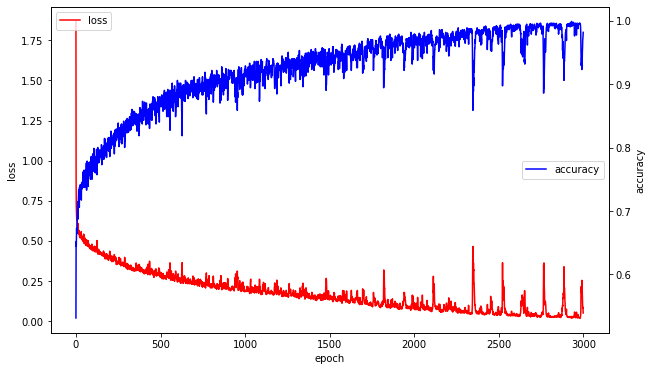

In [12]:
# 5.모델의 학습과정 표시하기 (validation set이 없는 경우)
import matplotlib.pyplot as plt
fig,loss_ax = plt.subplots(figsize=(10,6))
loss_ax.plot(hist.history['loss'], 'r', label='loss')
#loss_ax와 x축 공유
acc_ax=loss_ax.twinx()
acc_ax.plot(hist.history["accuracy"],"b",label="accuracy")

loss_ax.set_xlabel("epoch")
loss_ax.set_ylabel("loss")
acc_ax.set_ylabel("accuracy")

loss_ax.legend(loc="upper left")
acc_ax.legend(loc="center right")

In [13]:
#모델 평가하기
score=model.evaluate(X_test,Y_test)

3/3 [==============================] - 0s 1ms/step - loss: 2.3645 - accuracy: 0.7353


In [14]:
print("loss:%s,accuracy:%s"%(score[0],score[1]))

loss:2.364509344100952,accuracy:0.7352941036224365


# 6.모델 사용하기

In [15]:
model.predict(np.array([[6,148,72,35,0,33.6,0.627,50]]))

array([[0.9993989]], dtype=float32)

In [16]:
#피마 인디언 당뇨발병 예측 (위는 binary classification 이여서 원핫인코딩을 안함) 원핫인코딩 사용한 예측 - 각자 해보기

# 데이터셋 가져와 훈련셋, 검증셋, 훈련셋, 독립변수와 타겟변수. 타겟변수는 원핫인코딩
# 모델생성(input_dim = 8, 최종 출력=2, activation function에 softmax)
# 모델 학습과정 설정(loss="categorical_crossentropy)
# 모델 학습하기
# 모델 평가하기
# 모델사용하기

In [1]:
import numpy as np #csv 파일을 numpy 배열로 읽기
import tensorflow.keras.utils as utils #원핫인코딩
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
import matplotlib.pyplot as plt

In [2]:
#1.데이터셋 가져와 훈련셋,검증셋,훈련셋,독립변수와 타겟변수,타겟변수는 원핫 인코딩
dataset=np.loadtxt('data/pima-indians-diabetes.csv',delimiter=",")
dataset.shape

(768, 9)

In [3]:
#학습용 데이터(훈련데이터=훈련셋) 600개
X_train=dataset[:600,:-1]
Y_train=dataset[:600,-1]
#검증용 데이터(validation 셋) 100개
X_val=dataset[600:700,:-1]
Y_val=dataset[600:700,-1]
#테스트 데이터(시험데이터=시험셋) 68개
X_test=dataset[700:,:-1]
Y_test=dataset[700:,-1]
#원핫인코딩
# 0 --(원핫인코딩) --> 1 0
# 1 --(원핫인코딩) --> 0 1
Y_train=utils.to_categorical(Y_train,2)
Y_val=utils.to_categorical(Y_val,2)
Y_test=utils.to_categorical(Y_test,2)
print('훈련셋 :',X_train.shape, Y_train.shape)
print('검증셋 :',X_val.shape, Y_val.shape)
print('테스트셋 :',X_test.shape, Y_test.shape)

훈련셋 : (600, 8) (600, 2)
검증셋 : (100, 8) (100, 2)
테스트셋 : (68, 8) (68, 2)


In [4]:
# 2. 모델생성(input_dim = 8, 최종 출력=2, activation function에 softmax)
model2=Sequential()
model2.add(Dense(12, input_dim=8, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(2, activation='softmax'))

In [5]:
# 3. 학습과정 설정
model2.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [6]:
hist=model2.fit(X_train,Y_train,epochs=1500,batch_size=64,validation_data=(X_val,Y_val))

Epoch 1/1500
10/10 [==============================] - 0s 12ms/step - loss: 30.7632 - accuracy: 0.6533 - val_loss: 24.7823 - val_accuracy: 0.6600
Epoch 2/1500
10/10 [==============================] - 0s 2ms/step - loss: 21.6496 - accuracy: 0.5817 - val_loss: 18.6146 - val_accuracy: 0.5200
Epoch 3/1500
10/10 [==============================] - 0s 2ms/step - loss: 17.0824 - accuracy: 0.5167 - val_loss: 14.3586 - val_accuracy: 0.4900
Epoch 4/1500
10/10 [==============================] - 0s 2ms/step - loss: 12.2271 - accuracy: 0.5133 - val_loss: 9.6825 - val_accuracy: 0.4600
Epoch 5/1500
10/10 [==============================] - 0s 2ms/step - loss: 7.3804 - accuracy: 0.5117 - val_loss: 4.1634 - val_accuracy: 0.4700
Epoch 6/1500
10/10 [==============================] - 0s 2ms/step - loss: 3.0405 - accuracy: 0.5383 - val_loss: 2.3110 - val_accuracy: 0.5500
Epoch 7/1500
10/10 [==============================] - 0s 2ms/step - loss: 2.3556 - accuracy: 0.5917 - val_loss: 2.1323 - val_accuracy: 0.690

10/10 [==============================] - 0s 2ms/step - loss: 0.7604 - accuracy: 0.6850 - val_loss: 0.8127 - val_accuracy: 0.5700
Epoch 59/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.7822 - accuracy: 0.6883 - val_loss: 0.8619 - val_accuracy: 0.5600
Epoch 60/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.7744 - accuracy: 0.6450 - val_loss: 0.8193 - val_accuracy: 0.5700
Epoch 61/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.7633 - accuracy: 0.6650 - val_loss: 0.7740 - val_accuracy: 0.6500
Epoch 62/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.8058 - accuracy: 0.6567 - val_loss: 0.7618 - val_accuracy: 0.6500
Epoch 63/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.7793 - accuracy: 0.6650 - val_loss: 0.7659 - val_accuracy: 0.6200
Epoch 64/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.7507 - accuracy: 0.6883 - val_loss: 0.8449 - val_accuracy: 0.5400
Epoch 65/1500

10/10 [==============================] - 0s 2ms/step - loss: 0.5948 - accuracy: 0.7183 - val_loss: 0.6143 - val_accuracy: 0.7000
Epoch 116/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.5982 - accuracy: 0.7117 - val_loss: 0.6049 - val_accuracy: 0.7100
Epoch 117/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.5979 - accuracy: 0.7167 - val_loss: 0.6118 - val_accuracy: 0.7000
Epoch 118/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.6031 - accuracy: 0.6967 - val_loss: 0.6163 - val_accuracy: 0.6900
Epoch 119/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.5839 - accuracy: 0.7183 - val_loss: 0.6044 - val_accuracy: 0.6900
Epoch 120/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.6054 - accuracy: 0.7167 - val_loss: 0.5916 - val_accuracy: 0.6700
Epoch 121/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.6088 - accuracy: 0.7017 - val_loss: 0.6320 - val_accuracy: 0.6600
Epoch 1

Epoch 172/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.5780 - accuracy: 0.7150 - val_loss: 0.5550 - val_accuracy: 0.7500
Epoch 173/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.5738 - accuracy: 0.7317 - val_loss: 0.6499 - val_accuracy: 0.6300
Epoch 174/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.5573 - accuracy: 0.7250 - val_loss: 0.5347 - val_accuracy: 0.7500
Epoch 175/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.5415 - accuracy: 0.7200 - val_loss: 0.5513 - val_accuracy: 0.7300
Epoch 176/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.5408 - accuracy: 0.7367 - val_loss: 0.5342 - val_accuracy: 0.7300
Epoch 177/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.5288 - accuracy: 0.7400 - val_loss: 0.5571 - val_accuracy: 0.7000
Epoch 178/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.5323 - accuracy: 0.7333 - val_loss: 0.5471 - val_accuracy:

Epoch 229/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.6349 - accuracy: 0.7250 - val_loss: 0.5430 - val_accuracy: 0.7300
Epoch 230/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.6028 - accuracy: 0.6983 - val_loss: 0.5370 - val_accuracy: 0.7000
Epoch 231/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.5143 - accuracy: 0.7517 - val_loss: 0.5527 - val_accuracy: 0.7300
Epoch 232/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.5337 - accuracy: 0.7600 - val_loss: 0.6487 - val_accuracy: 0.6400
Epoch 233/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.5283 - accuracy: 0.7317 - val_loss: 0.5223 - val_accuracy: 0.7300
Epoch 234/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.5069 - accuracy: 0.7500 - val_loss: 0.5257 - val_accuracy: 0.7200
Epoch 235/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.5069 - accuracy: 0.7417 - val_loss: 0.5215 - val_accuracy:

Epoch 286/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4836 - accuracy: 0.7583 - val_loss: 0.5408 - val_accuracy: 0.7700
Epoch 287/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4805 - accuracy: 0.7700 - val_loss: 0.5332 - val_accuracy: 0.7400
Epoch 288/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4846 - accuracy: 0.7583 - val_loss: 0.5792 - val_accuracy: 0.7000
Epoch 289/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4923 - accuracy: 0.7650 - val_loss: 0.5381 - val_accuracy: 0.7500
Epoch 290/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4960 - accuracy: 0.7650 - val_loss: 0.5470 - val_accuracy: 0.7600
Epoch 291/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.5022 - accuracy: 0.7567 - val_loss: 0.5520 - val_accuracy: 0.7500
Epoch 292/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.5076 - accuracy: 0.7467 - val_loss: 0.5489 - val_accuracy:

Epoch 343/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.5129 - accuracy: 0.7617 - val_loss: 0.5588 - val_accuracy: 0.7500
Epoch 344/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.5017 - accuracy: 0.7700 - val_loss: 0.5641 - val_accuracy: 0.7500
Epoch 345/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.5213 - accuracy: 0.7550 - val_loss: 0.5692 - val_accuracy: 0.7000
Epoch 346/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.5050 - accuracy: 0.7483 - val_loss: 0.5295 - val_accuracy: 0.7400
Epoch 347/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4751 - accuracy: 0.7767 - val_loss: 0.5191 - val_accuracy: 0.7700
Epoch 348/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4873 - accuracy: 0.7667 - val_loss: 0.5236 - val_accuracy: 0.7700
Epoch 349/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4717 - accuracy: 0.7667 - val_loss: 0.5479 - val_accuracy:

Epoch 400/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4971 - accuracy: 0.7567 - val_loss: 0.5325 - val_accuracy: 0.7600
Epoch 401/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4775 - accuracy: 0.7600 - val_loss: 0.5462 - val_accuracy: 0.7600
Epoch 402/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4718 - accuracy: 0.7850 - val_loss: 0.5732 - val_accuracy: 0.7400
Epoch 403/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4877 - accuracy: 0.7617 - val_loss: 0.6076 - val_accuracy: 0.7200
Epoch 404/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4819 - accuracy: 0.7683 - val_loss: 0.5317 - val_accuracy: 0.7400
Epoch 405/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4640 - accuracy: 0.7750 - val_loss: 0.5676 - val_accuracy: 0.7700
Epoch 406/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4690 - accuracy: 0.7717 - val_loss: 0.5253 - val_accuracy:

Epoch 457/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4835 - accuracy: 0.7517 - val_loss: 0.6151 - val_accuracy: 0.7200
Epoch 458/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4920 - accuracy: 0.7533 - val_loss: 0.5253 - val_accuracy: 0.7400
Epoch 459/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4695 - accuracy: 0.7967 - val_loss: 0.5360 - val_accuracy: 0.7500
Epoch 460/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4628 - accuracy: 0.7783 - val_loss: 0.5194 - val_accuracy: 0.7600
Epoch 461/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4874 - accuracy: 0.7567 - val_loss: 0.5330 - val_accuracy: 0.7500
Epoch 462/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4613 - accuracy: 0.7817 - val_loss: 0.5039 - val_accuracy: 0.7600
Epoch 463/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4607 - accuracy: 0.7867 - val_loss: 0.5360 - val_accuracy:

Epoch 514/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4749 - accuracy: 0.7783 - val_loss: 0.5232 - val_accuracy: 0.7700
Epoch 515/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4617 - accuracy: 0.7700 - val_loss: 0.4978 - val_accuracy: 0.7500
Epoch 516/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4694 - accuracy: 0.7733 - val_loss: 0.4926 - val_accuracy: 0.7500
Epoch 517/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4540 - accuracy: 0.7783 - val_loss: 0.5068 - val_accuracy: 0.7600
Epoch 518/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4463 - accuracy: 0.7800 - val_loss: 0.4987 - val_accuracy: 0.7600
Epoch 519/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4463 - accuracy: 0.7850 - val_loss: 0.5075 - val_accuracy: 0.7500
Epoch 520/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4468 - accuracy: 0.7933 - val_loss: 0.5053 - val_accuracy:

Epoch 571/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4504 - accuracy: 0.7883 - val_loss: 0.4953 - val_accuracy: 0.7700
Epoch 572/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4521 - accuracy: 0.7800 - val_loss: 0.4940 - val_accuracy: 0.7500
Epoch 573/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4405 - accuracy: 0.7883 - val_loss: 0.5019 - val_accuracy: 0.7500
Epoch 574/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4404 - accuracy: 0.7883 - val_loss: 0.5264 - val_accuracy: 0.7500
Epoch 575/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4586 - accuracy: 0.7783 - val_loss: 0.5320 - val_accuracy: 0.7800
Epoch 576/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4385 - accuracy: 0.7867 - val_loss: 0.4947 - val_accuracy: 0.7400
Epoch 577/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4425 - accuracy: 0.7950 - val_loss: 0.4944 - val_accuracy:

Epoch 628/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4479 - accuracy: 0.7833 - val_loss: 0.5165 - val_accuracy: 0.7600
Epoch 629/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4525 - accuracy: 0.7833 - val_loss: 0.5121 - val_accuracy: 0.7600
Epoch 630/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4373 - accuracy: 0.7950 - val_loss: 0.4960 - val_accuracy: 0.7800
Epoch 631/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4576 - accuracy: 0.7850 - val_loss: 0.5101 - val_accuracy: 0.7700
Epoch 632/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4461 - accuracy: 0.7950 - val_loss: 0.4976 - val_accuracy: 0.7500
Epoch 633/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4369 - accuracy: 0.7917 - val_loss: 0.5124 - val_accuracy: 0.7700
Epoch 634/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4480 - accuracy: 0.7883 - val_loss: 0.5252 - val_accuracy:

Epoch 685/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4409 - accuracy: 0.7950 - val_loss: 0.4978 - val_accuracy: 0.7600
Epoch 686/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4395 - accuracy: 0.7833 - val_loss: 0.4987 - val_accuracy: 0.7500
Epoch 687/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4334 - accuracy: 0.7983 - val_loss: 0.5034 - val_accuracy: 0.7600
Epoch 688/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4361 - accuracy: 0.7883 - val_loss: 0.5215 - val_accuracy: 0.7600
Epoch 689/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4372 - accuracy: 0.7817 - val_loss: 0.5074 - val_accuracy: 0.7800
Epoch 690/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4357 - accuracy: 0.7817 - val_loss: 0.5077 - val_accuracy: 0.7300
Epoch 691/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4459 - accuracy: 0.7967 - val_loss: 0.4886 - val_accuracy:

Epoch 742/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4321 - accuracy: 0.8033 - val_loss: 0.4951 - val_accuracy: 0.7500
Epoch 743/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4345 - accuracy: 0.7933 - val_loss: 0.4914 - val_accuracy: 0.7500
Epoch 744/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4327 - accuracy: 0.7917 - val_loss: 0.4905 - val_accuracy: 0.7500
Epoch 745/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4390 - accuracy: 0.7817 - val_loss: 0.4877 - val_accuracy: 0.7800
Epoch 746/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4386 - accuracy: 0.7867 - val_loss: 0.4900 - val_accuracy: 0.7600
Epoch 747/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4323 - accuracy: 0.7900 - val_loss: 0.4966 - val_accuracy: 0.7600
Epoch 748/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4330 - accuracy: 0.7900 - val_loss: 0.4950 - val_accuracy:

Epoch 799/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4463 - accuracy: 0.7800 - val_loss: 0.4863 - val_accuracy: 0.7800
Epoch 800/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4505 - accuracy: 0.7800 - val_loss: 0.4837 - val_accuracy: 0.7500
Epoch 801/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4887 - accuracy: 0.7583 - val_loss: 0.4928 - val_accuracy: 0.7600
Epoch 802/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4543 - accuracy: 0.7850 - val_loss: 0.4865 - val_accuracy: 0.7800
Epoch 803/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4280 - accuracy: 0.7933 - val_loss: 0.4842 - val_accuracy: 0.7400
Epoch 804/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4352 - accuracy: 0.7900 - val_loss: 0.4836 - val_accuracy: 0.7600
Epoch 805/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4346 - accuracy: 0.7967 - val_loss: 0.4883 - val_accuracy:

Epoch 856/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4581 - accuracy: 0.7750 - val_loss: 0.4913 - val_accuracy: 0.7700
Epoch 857/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4473 - accuracy: 0.7700 - val_loss: 0.4876 - val_accuracy: 0.7800
Epoch 858/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4576 - accuracy: 0.7733 - val_loss: 0.4906 - val_accuracy: 0.7600
Epoch 859/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4284 - accuracy: 0.7967 - val_loss: 0.4857 - val_accuracy: 0.7600
Epoch 860/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4244 - accuracy: 0.8000 - val_loss: 0.4964 - val_accuracy: 0.7900
Epoch 861/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4258 - accuracy: 0.7983 - val_loss: 0.4901 - val_accuracy: 0.7600
Epoch 862/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4479 - accuracy: 0.7817 - val_loss: 0.5352 - val_accuracy:

Epoch 913/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4275 - accuracy: 0.7983 - val_loss: 0.5137 - val_accuracy: 0.7600
Epoch 914/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4650 - accuracy: 0.7567 - val_loss: 0.5871 - val_accuracy: 0.7300
Epoch 915/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4583 - accuracy: 0.7700 - val_loss: 0.5936 - val_accuracy: 0.7300
Epoch 916/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4695 - accuracy: 0.7633 - val_loss: 0.5259 - val_accuracy: 0.7400
Epoch 917/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4269 - accuracy: 0.8050 - val_loss: 0.4932 - val_accuracy: 0.7800
Epoch 918/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4321 - accuracy: 0.7900 - val_loss: 0.4844 - val_accuracy: 0.7600
Epoch 919/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4306 - accuracy: 0.8000 - val_loss: 0.5445 - val_accuracy:

Epoch 970/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4796 - accuracy: 0.7867 - val_loss: 0.6611 - val_accuracy: 0.6600
Epoch 971/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4640 - accuracy: 0.7767 - val_loss: 0.5161 - val_accuracy: 0.7600
Epoch 972/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4377 - accuracy: 0.7783 - val_loss: 0.4930 - val_accuracy: 0.7700
Epoch 973/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4516 - accuracy: 0.7900 - val_loss: 0.4866 - val_accuracy: 0.7700
Epoch 974/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.7867 - val_loss: 0.4936 - val_accuracy: 0.7700
Epoch 975/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4275 - accuracy: 0.7900 - val_loss: 0.4848 - val_accuracy: 0.7600
Epoch 976/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4245 - accuracy: 0.7833 - val_loss: 0.4828 - val_accuracy:

Epoch 1027/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4309 - accuracy: 0.7933 - val_loss: 0.4860 - val_accuracy: 0.7700
Epoch 1028/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4223 - accuracy: 0.7967 - val_loss: 0.4926 - val_accuracy: 0.7700
Epoch 1029/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4228 - accuracy: 0.8017 - val_loss: 0.4921 - val_accuracy: 0.7600
Epoch 1030/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4208 - accuracy: 0.8017 - val_loss: 0.5468 - val_accuracy: 0.7300
Epoch 1031/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4248 - accuracy: 0.8017 - val_loss: 0.4946 - val_accuracy: 0.7700
Epoch 1032/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4348 - accuracy: 0.7883 - val_loss: 0.5062 - val_accuracy: 0.7600
Epoch 1033/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4334 - accuracy: 0.8017 - val_loss: 0.4923 - val_ac

10/10 [==============================] - 0s 2ms/step - loss: 0.4248 - accuracy: 0.8033 - val_loss: 0.4833 - val_accuracy: 0.7700
Epoch 1084/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4563 - accuracy: 0.7850 - val_loss: 0.5087 - val_accuracy: 0.7400
Epoch 1085/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4412 - accuracy: 0.7833 - val_loss: 0.5239 - val_accuracy: 0.7600
Epoch 1086/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4510 - accuracy: 0.7683 - val_loss: 0.5652 - val_accuracy: 0.7300
Epoch 1087/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4595 - accuracy: 0.7783 - val_loss: 0.5127 - val_accuracy: 0.7400
Epoch 1088/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4348 - accuracy: 0.7867 - val_loss: 0.5053 - val_accuracy: 0.7900
Epoch 1089/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4332 - accuracy: 0.7950 - val_loss: 0.5656 - val_accuracy: 0.7500
E

10/10 [==============================] - 0s 2ms/step - loss: 0.5357 - accuracy: 0.7500 - val_loss: 0.6656 - val_accuracy: 0.6900
Epoch 1140/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.5060 - accuracy: 0.7667 - val_loss: 0.5400 - val_accuracy: 0.7400
Epoch 1141/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4752 - accuracy: 0.7717 - val_loss: 0.4919 - val_accuracy: 0.8200
Epoch 1142/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4588 - accuracy: 0.7833 - val_loss: 0.4808 - val_accuracy: 0.7600
Epoch 1143/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4277 - accuracy: 0.7917 - val_loss: 0.4731 - val_accuracy: 0.7800
Epoch 1144/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4329 - accuracy: 0.7950 - val_loss: 0.4901 - val_accuracy: 0.7600
Epoch 1145/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4256 - accuracy: 0.8000 - val_loss: 0.4857 - val_accuracy: 0.7800
E

10/10 [==============================] - 0s 2ms/step - loss: 0.4617 - accuracy: 0.7817 - val_loss: 0.5019 - val_accuracy: 0.7600
Epoch 1196/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4252 - accuracy: 0.7917 - val_loss: 0.5014 - val_accuracy: 0.7600
Epoch 1197/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4268 - accuracy: 0.8000 - val_loss: 0.5336 - val_accuracy: 0.7400
Epoch 1198/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4385 - accuracy: 0.7833 - val_loss: 0.5722 - val_accuracy: 0.7400
Epoch 1199/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4377 - accuracy: 0.7917 - val_loss: 0.5386 - val_accuracy: 0.7400
Epoch 1200/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4491 - accuracy: 0.7783 - val_loss: 0.5364 - val_accuracy: 0.7700
Epoch 1201/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4866 - accuracy: 0.7650 - val_loss: 0.5497 - val_accuracy: 0.7300
E

10/10 [==============================] - 0s 2ms/step - loss: 0.4193 - accuracy: 0.7900 - val_loss: 0.5359 - val_accuracy: 0.7600
Epoch 1252/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4388 - accuracy: 0.7850 - val_loss: 0.4921 - val_accuracy: 0.7700
Epoch 1253/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4291 - accuracy: 0.7900 - val_loss: 0.4980 - val_accuracy: 0.7800
Epoch 1254/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4281 - accuracy: 0.7917 - val_loss: 0.4957 - val_accuracy: 0.7700
Epoch 1255/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4326 - accuracy: 0.7950 - val_loss: 0.4959 - val_accuracy: 0.7600
Epoch 1256/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4328 - accuracy: 0.8133 - val_loss: 0.5208 - val_accuracy: 0.7700
Epoch 1257/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4362 - accuracy: 0.7933 - val_loss: 0.4888 - val_accuracy: 0.7600
E

10/10 [==============================] - 0s 2ms/step - loss: 0.4262 - accuracy: 0.7883 - val_loss: 0.5236 - val_accuracy: 0.7900
Epoch 1308/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4285 - accuracy: 0.8067 - val_loss: 0.5005 - val_accuracy: 0.7500
Epoch 1309/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4366 - accuracy: 0.7767 - val_loss: 0.5265 - val_accuracy: 0.7700
Epoch 1310/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4220 - accuracy: 0.7933 - val_loss: 0.4999 - val_accuracy: 0.7800
Epoch 1311/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4228 - accuracy: 0.7933 - val_loss: 0.5130 - val_accuracy: 0.7700
Epoch 1312/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4208 - accuracy: 0.8050 - val_loss: 0.4987 - val_accuracy: 0.7600
Epoch 1313/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4170 - accuracy: 0.8033 - val_loss: 0.4964 - val_accuracy: 0.7900
E

10/10 [==============================] - 0s 2ms/step - loss: 0.4401 - accuracy: 0.7883 - val_loss: 0.5630 - val_accuracy: 0.7500
Epoch 1364/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4455 - accuracy: 0.7867 - val_loss: 0.5008 - val_accuracy: 0.7600
Epoch 1365/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4234 - accuracy: 0.8033 - val_loss: 0.4956 - val_accuracy: 0.7600
Epoch 1366/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4350 - accuracy: 0.7900 - val_loss: 0.5104 - val_accuracy: 0.7900
Epoch 1367/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4389 - accuracy: 0.8067 - val_loss: 0.5164 - val_accuracy: 0.7800
Epoch 1368/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4509 - accuracy: 0.7733 - val_loss: 0.5182 - val_accuracy: 0.7900
Epoch 1369/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4382 - accuracy: 0.7750 - val_loss: 0.4933 - val_accuracy: 0.7900
E

10/10 [==============================] - 0s 2ms/step - loss: 0.4311 - accuracy: 0.7850 - val_loss: 0.4933 - val_accuracy: 0.7800
Epoch 1420/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4393 - accuracy: 0.7983 - val_loss: 0.5011 - val_accuracy: 0.7800
Epoch 1421/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4273 - accuracy: 0.7850 - val_loss: 0.5004 - val_accuracy: 0.7900
Epoch 1422/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4379 - accuracy: 0.8000 - val_loss: 0.4979 - val_accuracy: 0.7700
Epoch 1423/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4469 - accuracy: 0.7783 - val_loss: 0.4937 - val_accuracy: 0.7700
Epoch 1424/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4709 - accuracy: 0.7833 - val_loss: 0.5304 - val_accuracy: 0.7400
Epoch 1425/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4196 - accuracy: 0.7933 - val_loss: 0.5112 - val_accuracy: 0.7700
E

10/10 [==============================] - 0s 2ms/step - loss: 0.4248 - accuracy: 0.8067 - val_loss: 0.5114 - val_accuracy: 0.7500
Epoch 1476/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4197 - accuracy: 0.7933 - val_loss: 0.5034 - val_accuracy: 0.7700
Epoch 1477/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4124 - accuracy: 0.7967 - val_loss: 0.4934 - val_accuracy: 0.7700
Epoch 1478/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4138 - accuracy: 0.8083 - val_loss: 0.5482 - val_accuracy: 0.7600
Epoch 1479/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4263 - accuracy: 0.7950 - val_loss: 0.5135 - val_accuracy: 0.8000
Epoch 1480/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4370 - accuracy: 0.7817 - val_loss: 0.4993 - val_accuracy: 0.7400
Epoch 1481/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.7983 - val_loss: 0.5309 - val_accuracy: 0.7700
E

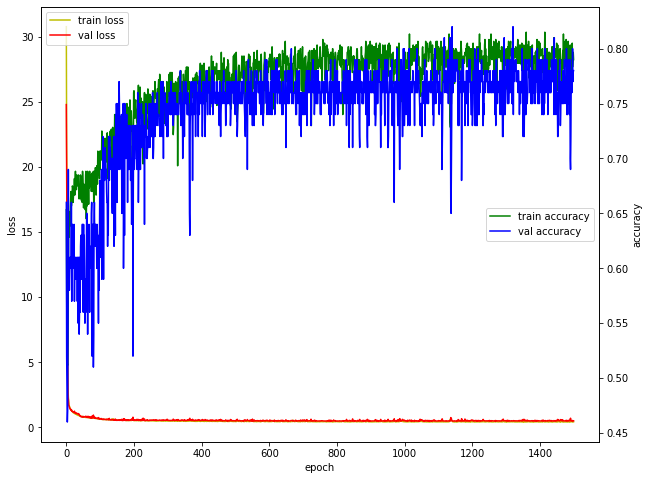

In [7]:
# 5. 모델의 학습과정 표시하기
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,8))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label="val loss")

#loss_ax와 x축을 공유하는 acc_ax 생성
acc_ax=loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='center right')
plt.show()

In [8]:
# 모델 평가
score=model2.evaluate(X_test,Y_test)

3/3 [==============================] - 0s 1ms/step - loss: 0.5502 - accuracy: 0.7794


In [9]:
# 7. 모델 사용하기
X_train[0]

array([  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,
        50.   ])

In [12]:
model2.predict(np.array([[6,148,72,35,0,33.6,0.627,50]]))

array([[0.44620815, 0.5537919 ]], dtype=float32)

In [14]:
model2.predict(np.array([[6,148,72,35,0,33.6,0.627,50]])).argmax()

1

In [15]:
model2.predict_classes(np.array([[6,148,72,35,0,33.6,0.62,30]]))

D:\anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([1], dtype=int64)